# Bert-Base Sentiment

In [1]:
import torch
print(torch.__version__)

2.5.0+cu121


In [2]:
from transformers import set_seed
from transformers import pipeline
set_seed(0)

In [ ]:
# !pip install -U transformers
# !pip install -U accelerate
# !pip install -U datasets
# !pip install -U bertviz
# !pip install -U umap-learn
# !pip install -U seaborn --upgrade

In [4]:
import pandas as pd
df = pd.read_csv("twitter_multi_class_sentiment.csv")

In [5]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [6]:
import matplotlib.pyplot as plt

<Axes: ylabel='label_name'>

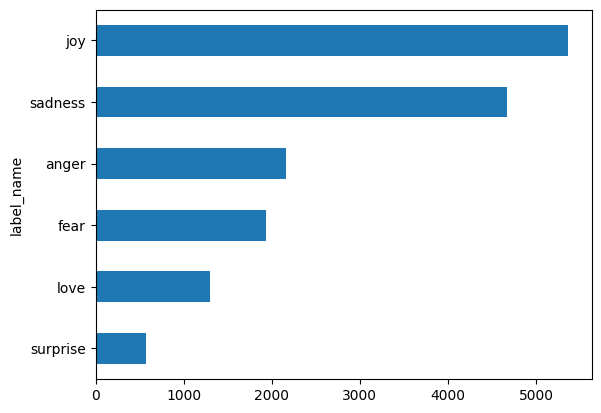

In [7]:
df['label_name'].value_counts(ascending=True).plot.barh()

In [8]:
df['words_per_tweet'] = df['text'].str.split().apply(len)

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

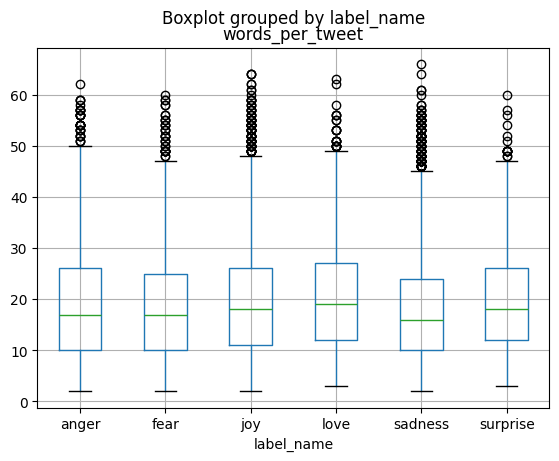

In [9]:
df.boxplot("words_per_tweet", by="label_name")

In [10]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [11]:
text = "I Love machien learnig Tokenization is awesome"

encoded = tokenizer(text)

print(encoded)



{'input_ids': [101, 1045, 2293, 24532, 9013, 4553, 8004, 19204, 3989, 2003, 12476, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [12]:
len(tokenizer.vocab), tokenizer.vocab, tokenizer.model_max_length

(30522,
 {'mrna': 28848,
  'bluegrass': 21286,
  'newman': 10625,
  'nest': 9089,
  'wurttemberg': 16346,
  'shaking': 5513,
  '##tura': 27431,
  'freelance': 15919,
  'valley': 3028,
  'commemorative': 17524,
  'malaga': 27382,
  '##cer': 17119,
  'contentious': 29308,
  'kaufman': 23699,
  '##ণ': 29897,
  'snowfall': 26043,
  'consumption': 8381,
  '[unused903]': 908,
  '[unused287]': 292,
  '##skie': 23955,
  'listings': 26213,
  '1661': 24046,
  'pouch': 21445,
  'mira': 18062,
  'prints': 11204,
  'faults': 19399,
  'plata': 19534,
  '##rc': 11890,
  'incomes': 29373,
  'lima': 12967,
  'armory': 24139,
  'オ': 1699,
  'seldom': 15839,
  '幸': 1841,
  '1605': 28202,
  '210': 12875,
  'theoretically': 22634,
  'correlation': 16902,
  'sure': 2469,
  'suggesting': 9104,
  'litigation': 15382,
  'postseason': 17525,
  'viewing': 10523,
  'dutton': 28784,
  'designate': 24414,
  'ecclesiastical': 12301,
  '##eal': 15879,
  'endless': 10866,
  'in': 1999,
  '[unused152]': 157,
  'montagu

In [13]:
# data loadre and train test case

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, stratify=df["label_name"])

test, validation = train_test_split(test, test_size = 1/3, stratify = test['label_name'])

In [14]:
train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [15]:
from datasets import Dataset, DatasetDict

In [16]:
dataset  = DatasetDict(
    {
        "train": Dataset.from_pandas(train, preserve_index=False),
        "test": Dataset.from_pandas(test, preserve_index= False),
        "validation": Dataset.from_pandas(validation, preserve_index=False)
    }
)



In [17]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 1600
    })
})

In [18]:
def tokenize(batch):
    temp = tokenizer(batch['text'], padding = True, truncation = True)
    return temp

print(tokenize(dataset['train'][0]))

{'input_ids': [101, 1045, 3342, 3773, 2009, 2006, 1996, 8080, 1998, 3110, 2066, 1045, 2018, 1037, 4744, 2006, 2026, 3108, 1998, 2481, 2102, 7200, 2026, 3129, 2409, 2033, 2027, 2890, 2183, 2000, 20014, 19761, 2618, 2017, 2085, 1045, 2347, 2102, 6427, 1045, 2052, 5788, 1998, 2359, 2000, 2444, 2061, 6649, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [19]:
em_encoded = dataset.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [20]:
label2id = {x['label_name'] : x['label'] for x in dataset['train']}
id2label = {v : k for  k,v in label2id.items()}

In [21]:
id2label

{1: 'joy', 4: 'fear', 0: 'sadness', 2: 'love', 3: 'anger', 5: 'surprise'}

In [22]:
from transformers import AutoModel
import torch

In [23]:
model = AutoModel.from_pretrained(model_ckpt)

In [24]:
print(torch.cuda.is_available())

True


In [25]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [27]:
from transformers import TrainingArguments
batch_size = 64
training_dir = "bert_base_train_dir"

In [28]:
training_args = TrainingArguments(
    output_dir = training_dir,
    overwrite_output_dir=True,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    evaluation_strategy = "epoch",
    disable_tqdm = False
)


c:\Users\saksh\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [29]:
# !pip install evaluate

In [30]:
import evaluate
import numpy as np
accuracy = evaluate.load("accuracy")

def compute_metrics_using_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis = 1)
    return accuracy.compute(predictions = predictions, references = labels)

In [31]:
# use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average = "weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
#Building model trainer

from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics=compute_metrics,
    train_dataset=em_encoded['train'],
    eval_dataset = em_encoded['validation'],
    tokenizer = tokenizer
)

C:\Users\saksh\AppData\Local\Temp\ipykernel_11332\3626769353.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [33]:
trainer.train()

  0%|          | 0/350 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.5441403985023499, 'eval_accuracy': 0.81125, 'eval_f1': 0.7762603347689802, 'eval_runtime': 3.788, 'eval_samples_per_second': 422.388, 'eval_steps_per_second': 6.6, 'epoch': 1.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.31716081500053406, 'eval_accuracy': 0.90625, 'eval_f1': 0.9039399164709638, 'eval_runtime': 3.7637, 'eval_samples_per_second': 425.111, 'eval_steps_per_second': 6.642, 'epoch': 2.0}
{'train_runtime': 180.9802, 'train_samples_per_second': 123.77, 'train_steps_per_second': 1.934, 'train_loss': 0.75670654296875, 'epoch': 2.0}


TrainOutput(global_step=350, training_loss=0.75670654296875, metrics={'train_runtime': 180.9802, 'train_samples_per_second': 123.77, 'train_steps_per_second': 1.934, 'total_flos': 863364156480000.0, 'train_loss': 0.75670654296875, 'epoch': 2.0})

## Model evaluation

In [34]:
preds_output = trainer.predict(em_encoded['test'])
preds_output.metrics

  0%|          | 0/50 [00:00<?, ?it/s]

{'test_loss': 0.3632034957408905,
 'test_accuracy': 0.8859375,
 'test_f1': 0.8824396043900222,
 'test_runtime': 8.7232,
 'test_samples_per_second': 366.836,
 'test_steps_per_second': 5.732}

In [35]:
y_preds = pred_outputs = np.argmax(preds_output.predictions, axis = 1)
y_true = em_encoded['test'][:]['label']

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       933
           1       0.89      0.92      0.91      1072
           2       0.80      0.60      0.68       261
           3       0.90      0.87      0.89       432
           4       0.84      0.90      0.87       387
           5       0.84      0.60      0.70       115

    accuracy                           0.89      3200
   macro avg       0.86      0.81      0.83      3200
weighted avg       0.88      0.89      0.88      3200



In [37]:
print(f"The problem labels are {id2label[5]} and {id2label[2]}")

The problem labels are surprise and love


In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

<Axes: >

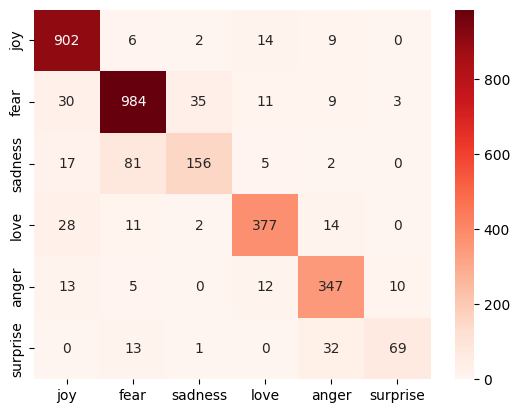

In [39]:
cm = confusion_matrix(y_true, y_preds)
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt = 'd', cmap = "Reds")


### Build prediction function and store the model

In [41]:
text = "The work is finally done"
def predict_sentiment(text):
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
        outputs = model(**input_encoded)
    print(id2label[torch.argmax(outputs.logits, dim = 1).item()])

predict_sentiment(text)

joy


In [42]:
trainer.save_model("bert-based_uncased_sentiment_model")

In [50]:
# pipeline for rpediction
from transformers import pipeline
classifier = pipeline('text-classification', model = 'bert-based_uncased_sentiment_model', device='cuda')
classifier([text, 'it'] )


[{'label': 'joy', 'score': 0.9004452228546143},
 {'label': 'sadness', 'score': 0.28871482610702515}]